<a href="https://colab.research.google.com/github/prateekpatil2004/Book-Recommendation-System/blob/main/forest_fire_detection_using_dl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("elmadafri/the-wildfire-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/the-wildfire-dataset


In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input


In [5]:
#to ensure gpu present or not
physical_devices = tf.config.list_physical_devices('GPU')
if(len(physical_devices)>0):
  tf.config.experimental.set_memory_growth(physical_devices[0], True)
  print("gpu is used!")
else:
  print("gpu unavilable")

gpu is used!


In [6]:
#load and explore the dataset
train_dir='/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/train'
test_dir='/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/test'
val_dir='/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/val'

In [7]:
classes=os.listdir(train_dir)
num_classes=len(classes)
print(f"the number of classes:{num_classes}")
print(f"the classes are:{classes}")

the number of classes:2
the classes are:['nofire', 'fire']


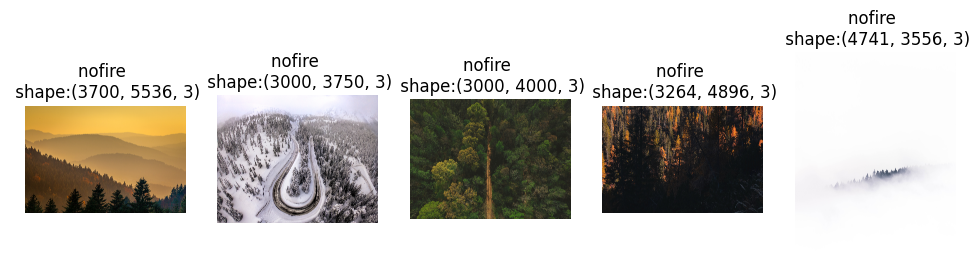

In [8]:
plt.figure(figsize=(12,10))
for i in range(5):
  class_path=os.path.join(train_dir,classes[0])
  image_files=os.listdir(class_path)[i]
  image_path=os.path.join(class_path,image_files)
  img=plt.imread(image_path)
  plt.subplot(1,5,i+1)
  plt.imshow(img)
  plt.title(f'{classes[0]} \n shape:{img.shape}')
  plt.axis('off')
plt.show()

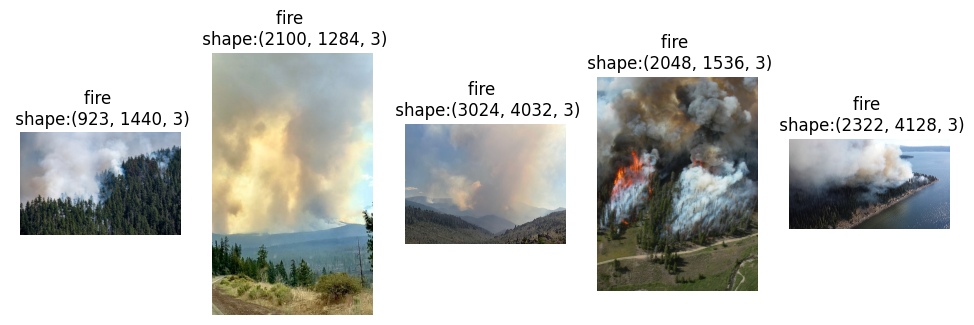

In [9]:
plt.figure(figsize=(12,10))
for i in range(5):
  class_path=os.path.join(train_dir,classes[1])
  image_files=os.listdir(class_path)[i]
  image_path=os.path.join(class_path,image_files)
  img=plt.imread(image_path)
  plt.subplot(1,5,i+1)
  plt.imshow(img)
  plt.title(f'{classes[1]} \n shape:{img.shape}')
  plt.axis('off')
plt.show()

In [10]:
#preprocessing
#image dimensions and batch size
img_width,img_height=150,150
batch_size=32
#data generation
train_datagen=ImageDataGenerator(rescale=1./255)
val_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)
train_generator=train_datagen.flow_from_directory(train_dir,
                                                  target_size=(img_width,img_height),
                                                  batch_size=batch_size,
                                                  class_mode='binary',
                                                  shuffle=True)
val_generator=val_datagen.flow_from_directory(val_dir,target_size=(img_width,img_height),
                                                  batch_size=batch_size,
                                                  class_mode='binary',
                                                  shuffle=True)
test_generator=test_datagen.flow_from_directory(test_dir,target_size=(img_width,img_height),
                                                  batch_size=batch_size,
                                                  class_mode='binary',
                                                  shuffle=True)

Found 1887 images belonging to 2 classes.
Found 402 images belonging to 2 classes.
Found 410 images belonging to 2 classes.


In [11]:
#mapping the indicces
class_mapping=train_generator.class_indices
print(class_mapping)
#extract the class names
class_names=list(class_mapping.keys())
print(class_names)

{'fire': 0, 'nofire': 1}
['fire', 'nofire']


In [12]:
#build the cnn model
model=Sequential(
    [
        Input(shape=(img_width,img_height,3)),
        Conv2D(32,(3,3),activation='relu'),
        MaxPooling2D(pool_size=(2,2)),

        Conv2D(64,(3,3),activation='relu'),
        MaxPooling2D(pool_size=(2,2)),

        Conv2D(128,(3,3),activation='relu'),
        MaxPooling2D(pool_size=(2,2)),

        Flatten(),
        Dense(512,activation='relu'),
        Dropout(0.5),
        Dense(1,activation='sigmoid')
    ]
)

In [13]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# train the model
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    epochs = 12,
    validation_data = val_generator,
    validation_steps = val_generator.samples // batch_size
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/12
 5/58 ━━━━━━━━━━━━━━━━━━━━ 5:19 6s/step - accuracy: 0.5311 - loss: 1.8193

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (104688771 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


10/58 ━━━━━━━━━━━━━━━━━━━━ 5:40 7s/step - accuracy: 0.5371 - loss: 1.5592

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (89747104 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


58/58 ━━━━━━━━━━━━━━━━━━━━ 496s 8s/step - accuracy: 0.5797 - loss: 0.9471 - val_accuracy: 0.6510 - val_loss: 0.5564
Epoch 2/12
 1/58 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.7812 - loss: 0.4347

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


58/58 ━━━━━━━━━━━━━━━━━━━━ 75s 1s/step - accuracy: 0.7812 - loss: 0.4347 - val_accuracy: 0.6901 - val_loss: 0.5518
Epoch 3/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 535s 8s/step - accuracy: 0.7368 - loss: 0.5271 - val_accuracy: 0.7760 - val_loss: 0.4766
Epoch 4/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 76s 1s/step - accuracy: 0.7812 - loss: 0.3686 - val_accuracy: 0.7370 - val_loss: 0.4893
Epoch 5/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.7610 - loss: 0.5003

In [ ]:
# Evaluate the model - plotting training and validation acc
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
# Evaluate the model - plotting training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
# Evaluate the model using test data
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print(f'Test Accuracy: {test_acc:.4f}')

In [ ]:
# Save the model
model.save('FFD.keras')

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Load the model
model = load_model('FFD.keras')

# Predict on new image - create a function
def predict_fire(img_path):
  img = image.load_img(img_path, target_size=(150, 150))
  img_array = image.img_to_array(img)
  img_array = np.expand_dims(img_array, axis=0)
  img_array /= 255.0

  prediction = model.predict(img_array)
  if prediction[0] > 0.5:
    predicted_class = class_names[1]
  else:
    predicted_class = class_names[0]

  plt.imshow(img)
  plt.title(f'Predicted: {predicted_class}')
  plt.axis('off')
  plt.show()

In [ ]:
os.listdir('/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/test/nofire')

In [ ]:
predict_fire('/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/test/nofire/35554264024_b33afa21ac_o.jpg')